<a href="https://colab.research.google.com/github/daniyal2211/Mohammed_Daniyal_Capstone/blob/main/Mohammed_Daniyal_SupplyChain_Notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ============================================================
# SECTION 1: IMPORT ALL REQUIRED LIBRARIES FOR THE PROJECT
# ============================================================

# Core packages
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Model Building (Baseline + Advanced)
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Preprocessing tools
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Visualization styling
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

print("All libraries imported successfully.")


All libraries imported successfully.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")


In [3]:
# ===============================
# SECTION 2: Load Dataset
# ===============================

from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['supply_chain_data.csv']))

# Display shape and first few rows
print("Dataset Shape:", df.shape)
df.head()


Saving supply_chain_data.csv to supply_chain_data.csv
Dataset Shape: (25000, 24)


,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [4]:
# ============================================================
# SECTION 3: DATA OVERVIEW & STRUCTURE
# ============================================================

print("Dataset Shape:", df.shape)
print("\n--- Columns ---")
print(df.columns)

print("\n--- Data Types ---")
print(df.dtypes)

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Duplicate Rows ---")
print(df.duplicated().sum())

print("\n--- Summary Statistics ---")
df.describe().T


Dataset Shape: (25000, 24)

--- Columns ---
Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

--- Data Types ---
Ware_house_ID                    object
WH_Manager_ID                    object
Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_

,count,mean,std,min,25%,50%,75%,max
num_refill_req_l3m,25000.0,4.089040,2.606612,0.0,2.0,4.0,6.0,8.0
transport_issue_l1y,25000.0,0.773680,1.199449,0.0,0.0,0.0,1.0,5.0
Competitor_in_mkt,25000.0,3.104200,1.141663,0.0,2.0,3.0,4.0,12.0
retail_shop_num,25000.0,4985.711560,1052.825252,1821.0,4313.0,4859.0,5500.0,11008.0
distributor_num,25000.0,42.418120,16.064329,15.0,29.0,42.0,56.0,70.0
flood_impacted,25000.0,0.098160,0.297537,0.0,0.0,0.0,0.0,1.0
flood_proof,25000.0,0.054640,0.227281,0.0,0.0,0.0,0.0,1.0
electric_supply,25000.0,0.656880,0.474761,0.0,0.0,1.0,1.0,1.0
dist_from_hub,25000.0,163.537320,62.718609,55.0,109.0,164.0,218.0,271.0
workers_num,24010.0,28.944398,7.872534,10.0,24.0,28.0,33.0,98.0


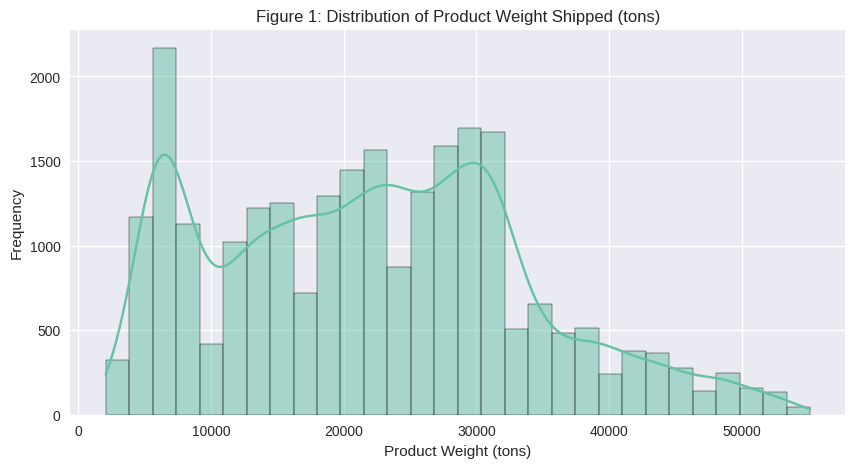

In [5]:
# ============================================================
# 4.1 UNIVARIATE ANALYSIS - TARGET VARIABLE
# ============================================================

plt.figure(figsize=(10,5))
sns.histplot(df['product_wg_ton'], bins=30, kde=True)
plt.title("Figure 1: Distribution of Product Weight Shipped (tons)")
plt.xlabel("Product Weight (tons)")
plt.ylabel("Frequency")
plt.show()

In [6]:
# Numerical features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

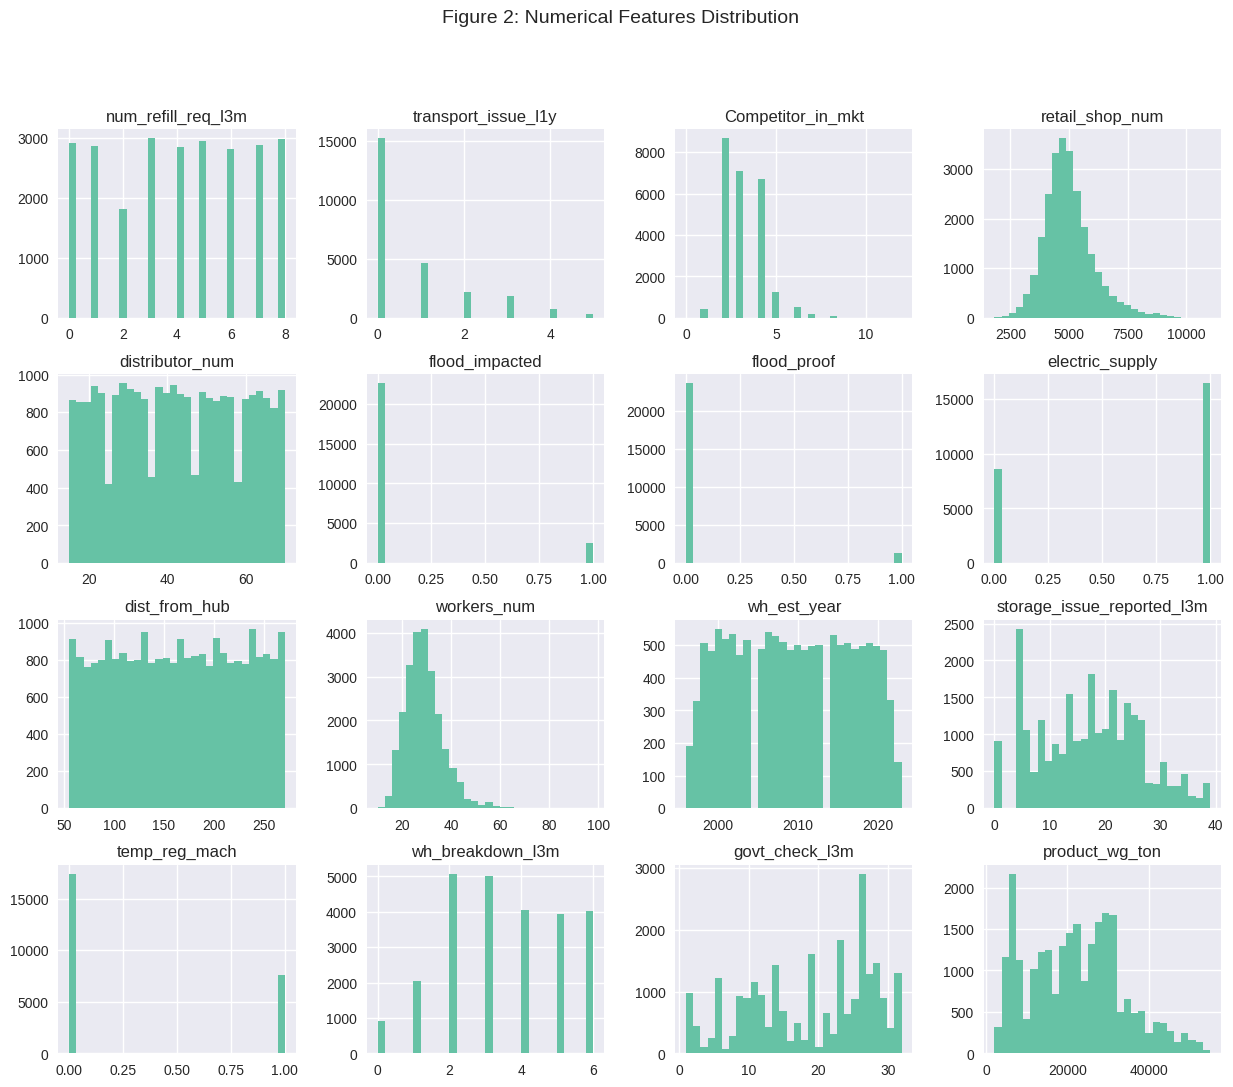

In [7]:
# Plot all numerical columns
df[num_cols].hist(figsize=(15,12), bins=30)
plt.suptitle("Figure 2: Numerical Features Distribution", fontsize=14)
plt.show()

In [8]:
# Categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

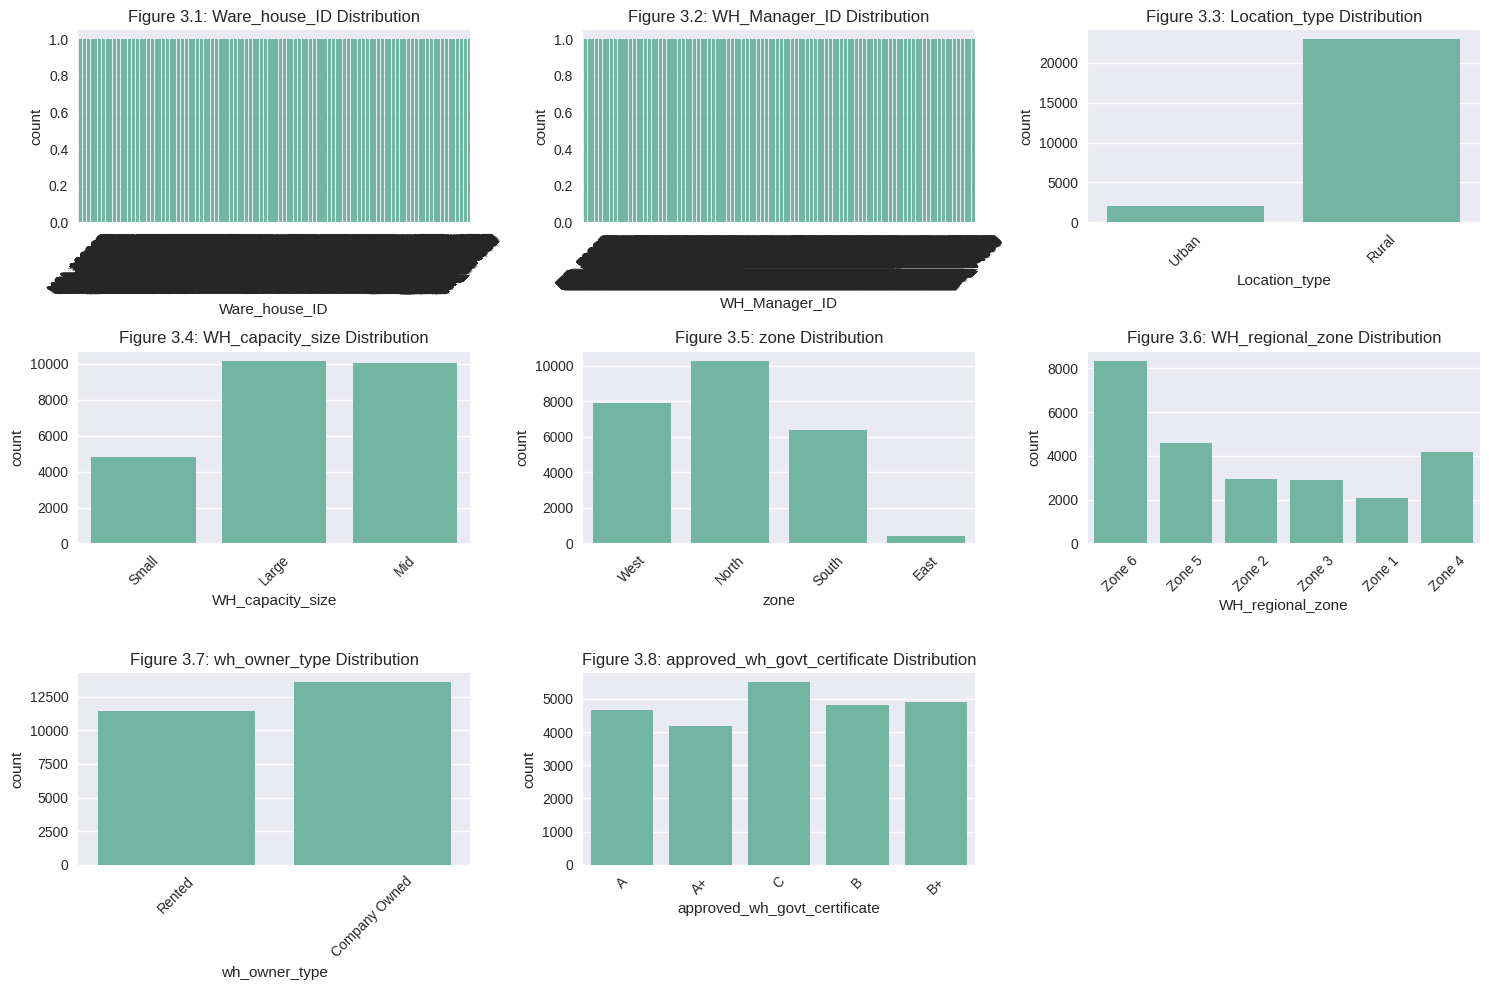

In [9]:
# Plot categorical columns
plt.figure(figsize=(15,10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3,3,i)
    sns.countplot(data=df, x=col)
    plt.title(f"Figure 3.{i}: {col} Distribution")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# ------------------------------
import os
os.makedirs("images", exist_ok=True)

# Exclude high-cardinality ID columns from visuals
id_cols = ['Ware_house_ID','WH_Manager_ID']
plot_df = df.copy()

# Convert any binary-coded ints (0/1) to category strings for nicer plotting if needed
binary_cols = ['flood_impacted','flood_proof','electric_supply','temp_reg_mach']
for c in binary_cols:
    if c in plot_df.columns:
        plot_df[c] = plot_df[c].astype(str)

# Numeric columns for correlation
num_cols = plot_df.select_dtypes(include=['int64','float64']).columns.tolist()
# remove target from corr if you want separate handling
num_cols_for_corr = [c for c in num_cols if c not in id_cols]

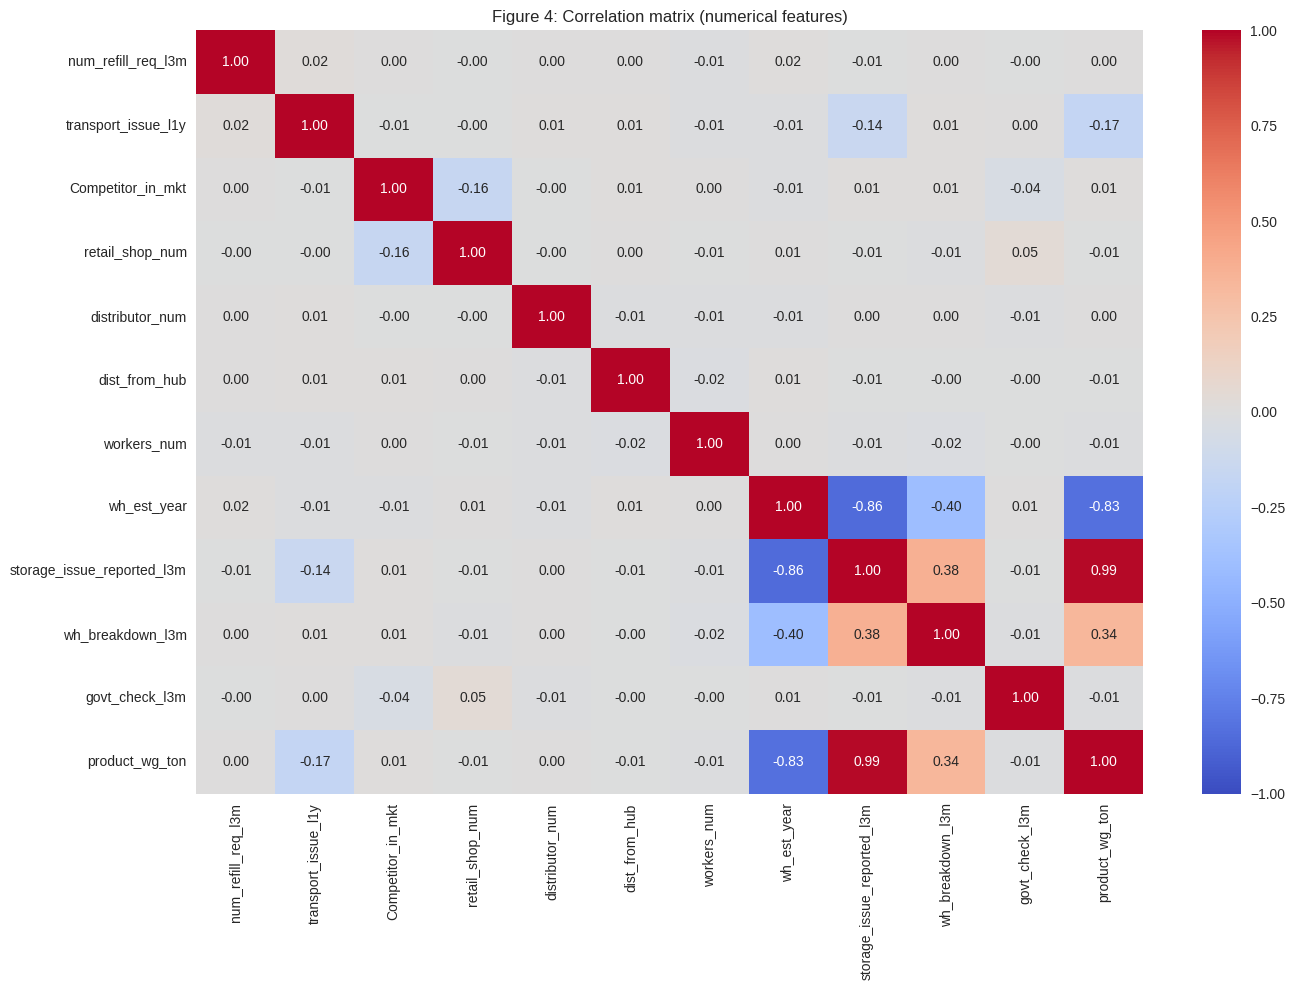

In [11]:
# ------------------------------
# 1) Correlation matrix (numerical features)
# ------------------------------
import numpy as np
corr = plot_df[num_cols_for_corr].corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Figure 4: Correlation matrix (numerical features)")
plt.tight_layout()
plt.savefig("images/Figure_4_corr_heatmap.png", dpi=200, bbox_inches='tight')
plt.show()


--- Location_type ---


,Location_type,count,mean,median
1,Urban,2043,25004.033774,25074.0
0,Rural,22957,21844.430108,22072.0


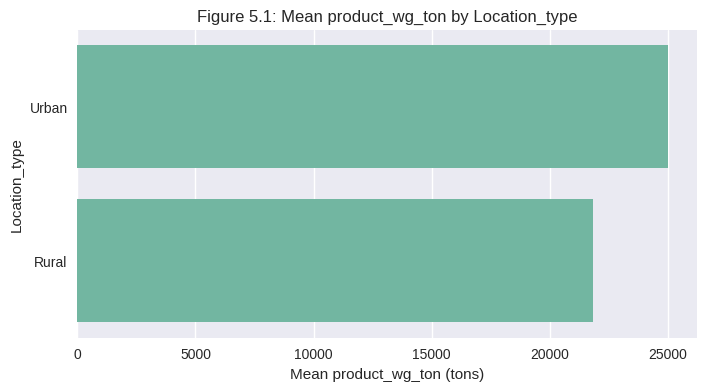


--- WH_capacity_size ---


,WH_capacity_size,count,mean,median
1,Mid,10020,22202.298104,22128.5
0,Large,10169,22100.487855,22093.0
2,Small,4811,21899.591561,22066.0


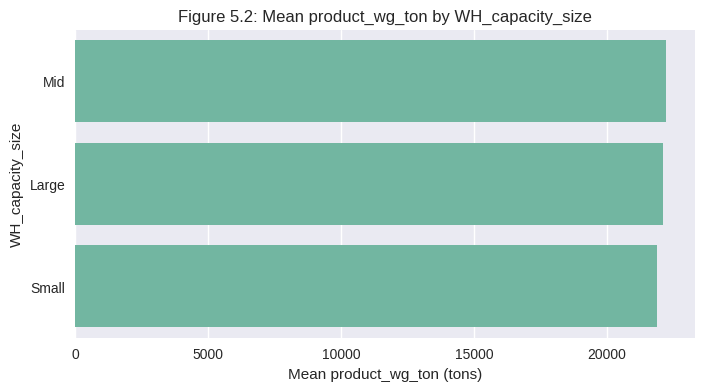


--- zone ---


,zone,count,mean,median
0,East,429,22721.452214,23081.0
1,North,10278,22199.437926,22111.0
3,West,7931,22079.384189,22105.0
2,South,6362,21933.495913,22071.0


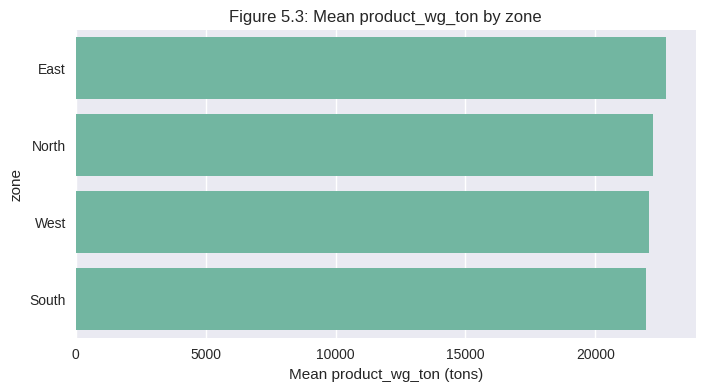


--- WH_regional_zone ---


,WH_regional_zone,count,mean,median
1,Zone 2,2963,22470.728316,23061.0
3,Zone 4,4176,22173.378592,22121.0
5,Zone 6,8339,22115.559540,22099.0
4,Zone 5,4587,22022.588402,22075.0
2,Zone 3,2881,21968.146477,22112.0
0,Zone 1,2054,21742.712756,21129.5


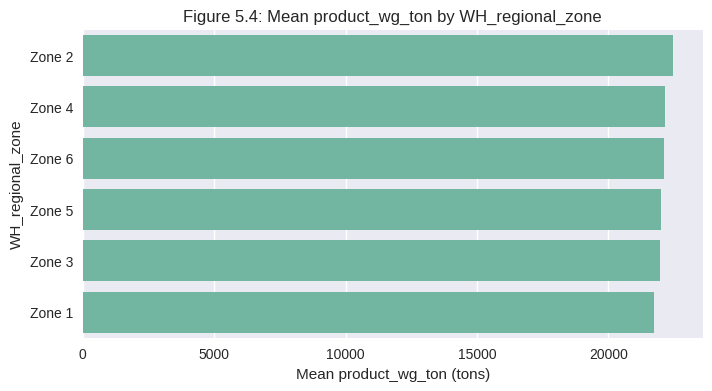


--- wh_owner_type ---


,wh_owner_type,count,mean,median
1,Rented,11422,22176.125810,22118.0
0,Company Owned,13578,22040.809692,22086.5


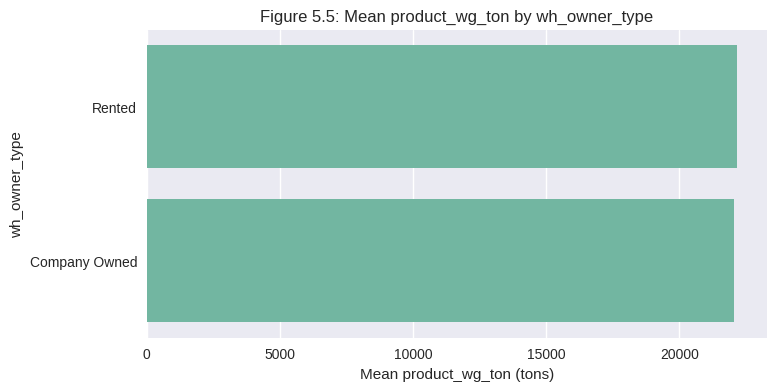

In [12]:
# ------------------------------
# 2) Mean target by important categorical variables (bar charts)
# ------------------------------
cats_to_check = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type']
for i, col in enumerate(cats_to_check,1):
    agg = plot_df.groupby(col)['product_wg_ton'].agg(['count','mean','median']).reset_index().sort_values('mean', ascending=False)
    print(f"\n--- {col} ---")
    display(agg.head(10))
    plt.figure(figsize=(8,4))
    sns.barplot(data=agg, x='mean', y=col, order=agg[col])
    plt.title(f"Figure 5.{i}: Mean product_wg_ton by {col}")
    plt.xlabel("Mean product_wg_ton (tons)")
    plt.ylabel(col)
    fname = f"images/Figure_5_{i}_{col}.png"
    plt.savefig(fname, dpi=200, bbox_inches='tight')
    plt.show()

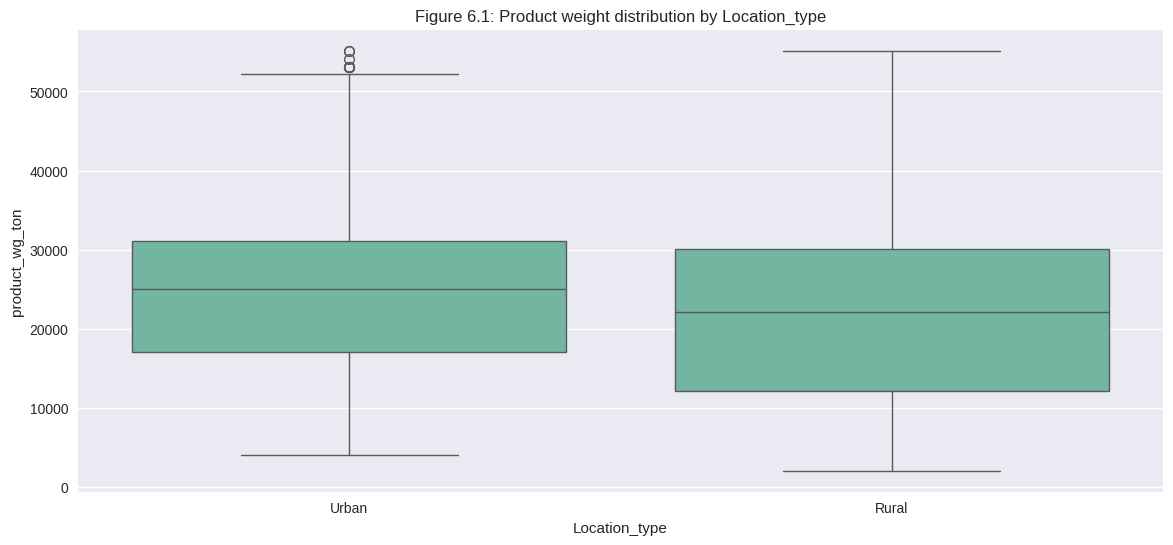

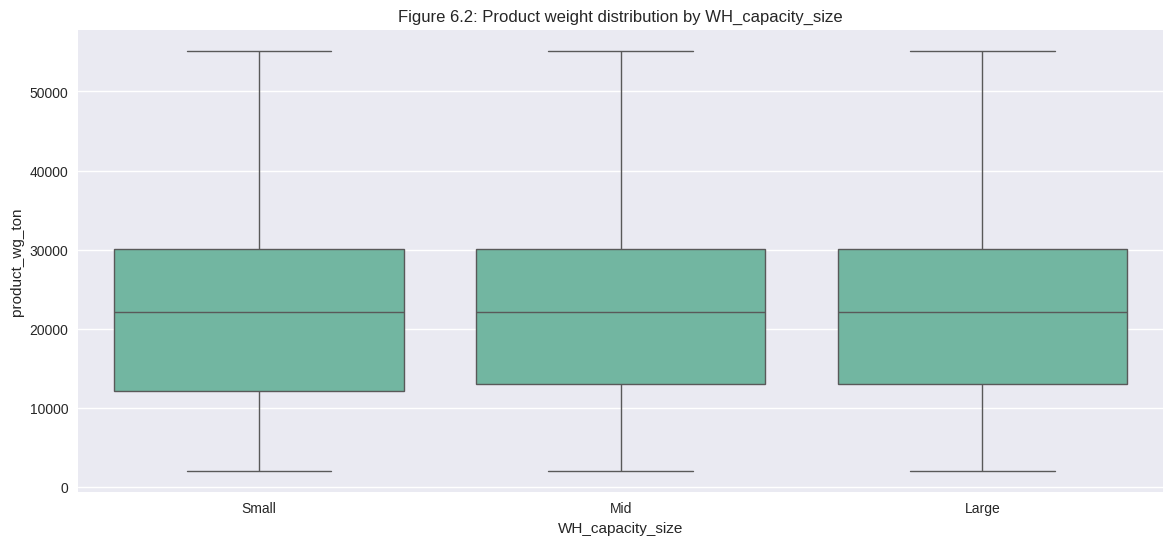

In [13]:
# ------------------------------
# 3) Boxplots: categorical vs product_wg_ton (shows dispersion/outliers)
# ------------------------------
cats_for_box = ['Location_type', 'WH_capacity_size', 'zone']
plt.figure(figsize=(14,6))
sns.boxplot(data=plot_df, x='Location_type', y='product_wg_ton')
plt.title("Figure 6.1: Product weight distribution by Location_type")
plt.savefig("images/Figure_6_1_box_location.png", dpi=200, bbox_inches='tight')
plt.show()

plt.figure(figsize=(14,6))
sns.boxplot(data=plot_df, x='WH_capacity_size', y='product_wg_ton', order=['Small','Mid','Large'])
plt.title("Figure 6.2: Product weight distribution by WH_capacity_size")
plt.savefig("images/Figure_6_2_box_capacity.png", dpi=200, bbox_inches='tight')
plt.show()

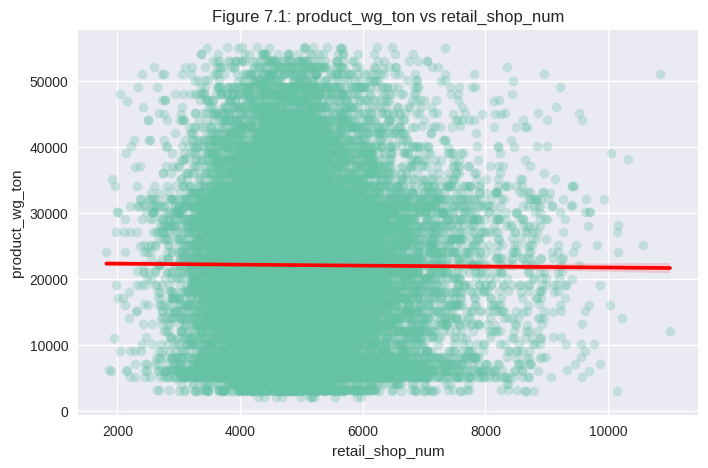

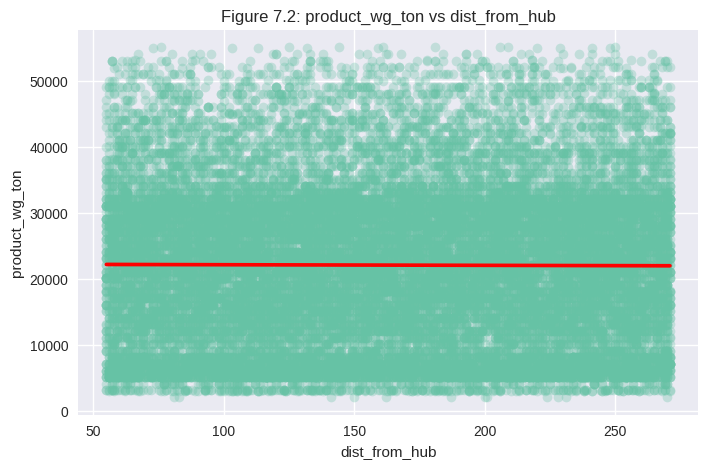

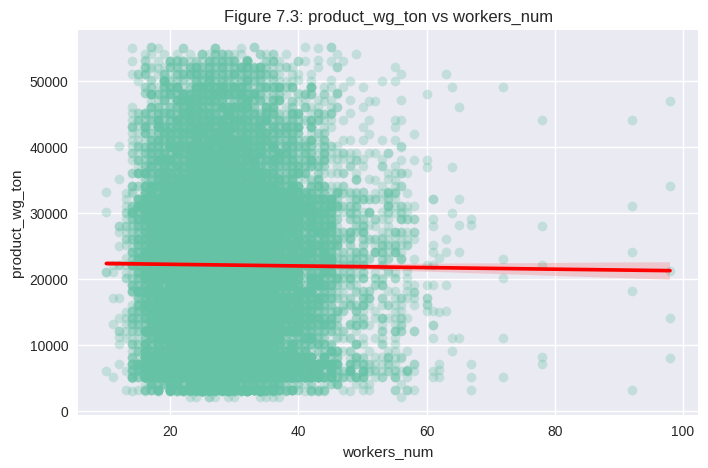

In [14]:
# ------------------------------
# 4) Scatterplots: numeric vs product_wg_ton with regression line
# ------------------------------
nums_to_plot = ['retail_shop_num','dist_from_hub','workers_num']
for i,c in enumerate(nums_to_plot,1):
    plt.figure(figsize=(8,5))
    sns.regplot(data=plot_df, x=c, y='product_wg_ton', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    plt.title(f"Figure 7.{i}: product_wg_ton vs {c}")
    plt.savefig(f"images/Figure_7_{i}_{c}.png", dpi=200, bbox_inches='tight')
    plt.show()

In [15]:
# ------------------------------
# 5) Table for Appendix: unique counts for IDs (small summary)
# ------------------------------
id_summary = pd.DataFrame({
    'column': id_cols,
    'unique_count': [df[c].nunique() for c in id_cols],
    'sample_values': [', '.join(map(str, df[c].unique()[:5])) for c in id_cols]
})
display(id_summary)
id_summary.to_csv("images/id_summary_table.csv", index=False)

,column,unique_count,sample_values
0,Ware_house_ID,25000,"WH_100000, WH_100001, WH_100002, WH_100003, WH..."
1,WH_Manager_ID,25000,"EID_50000, EID_50001, EID_50002, EID_50003, EI..."


In [16]:
# ============================================================
# SECTION 5: DATA PREPROCESSING
# 5.1 Duplicate Check
# ============================================================

print("Duplicate rows:", df.duplicated().sum())

# If duplicates exist, drop them
df = df.drop_duplicates()
print("Shape after duplicate removal:", df.shape)

Duplicate rows: 0
Shape after duplicate removal: (25000, 24)


In [17]:
# ============================================================
# 5.2 Missing Value Check & Treatment
# ============================================================

# Check missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n")
print(missing)

# % missing
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)
print("\nMissing Value Percentage:\n")
print(missing_percent)

# If no missing values, state explicitly
if missing.sum() == 0:
    print("\nNo missing values found in the dataset. No imputation required.")

Missing Values:

wh_est_year                     11881
workers_num                       990
approved_wh_govt_certificate      908
Ware_house_ID                       0
zone                                0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
transport_issue_l1y                 0
num_refill_req_l3m                  0
WH_regional_zone                    0
Competitor_in_mkt                   0
flood_impacted                      0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
dist_from_hub                       0
electric_supply                     0
flood_proof                         0
storage_issue_reported_l3m          0
temp_reg_mach                       0
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

Missing Value Percentage:

wh_est_year                   

In [18]:
# ============================================================
# 5.3 Outlier Detection & Treatment (IQR Method)
# ============================================================

import numpy as np

# Select numerical columns except IDs
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

# IQR function
def detect_outliers_IQR(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col].count()
    print(f"{col} → Outliers detected: {outliers}")
    return lower, upper

# Apply to all numerical columns
bounds = {}
for col in num_cols:
    lower, upper = detect_outliers_IQR(col)
    bounds[col] = (lower, upper)

bounds

num_refill_req_l3m → Outliers detected: 0
transport_issue_l1y → Outliers detected: 2943
Competitor_in_mkt → Outliers detected: 96
retail_shop_num → Outliers detected: 948
distributor_num → Outliers detected: 0
flood_impacted → Outliers detected: 2454
flood_proof → Outliers detected: 1366
electric_supply → Outliers detected: 0
dist_from_hub → Outliers detected: 0
workers_num → Outliers detected: 607
wh_est_year → Outliers detected: 0
storage_issue_reported_l3m → Outliers detected: 0
temp_reg_mach → Outliers detected: 0
wh_breakdown_l3m → Outliers detected: 0
govt_check_l3m → Outliers detected: 0
product_wg_ton → Outliers detected: 0


{'num_refill_req_l3m': (np.float64(-4.0), np.float64(12.0)),
 'transport_issue_l1y': (np.float64(-1.5), np.float64(2.5)),
 'Competitor_in_mkt': (np.float64(-1.0), np.float64(7.0)),
 'retail_shop_num': (np.float64(2532.5), np.float64(7280.5)),
 'distributor_num': (np.float64(-11.5), np.float64(96.5)),
 'flood_impacted': (np.float64(0.0), np.float64(0.0)),
 'flood_proof': (np.float64(0.0), np.float64(0.0)),
 'electric_supply': (np.float64(-1.5), np.float64(2.5)),
 'dist_from_hub': (np.float64(-54.5), np.float64(381.5)),
 'workers_num': (np.float64(10.5), np.float64(46.5)),
 'wh_est_year': (np.float64(1983.5), np.float64(2035.5)),
 'storage_issue_reported_l3m': (np.float64(-11.0), np.float64(45.0)),
 'temp_reg_mach': (np.float64(-1.5), np.float64(2.5)),
 'wh_breakdown_l3m': (np.float64(-2.5), np.float64(9.5)),
 'govt_check_l3m': (np.float64(-11.5), np.float64(48.5)),
 'product_wg_ton': (np.float64(-12507.0), np.float64(55669.0))}

In [19]:
# ============================================================
# 5.3B Apply outlier capping (Winsorization)
# ============================================================

df_capped = df.copy()

for col in num_cols:
    lower, upper = bounds[col]
    df_capped[col] = np.where(df_capped[col] < lower, lower,
                         np.where(df_capped[col] > upper, upper, df_capped[col]))

print("Outlier treatment (capping) completed.")

Outlier treatment (capping) completed.


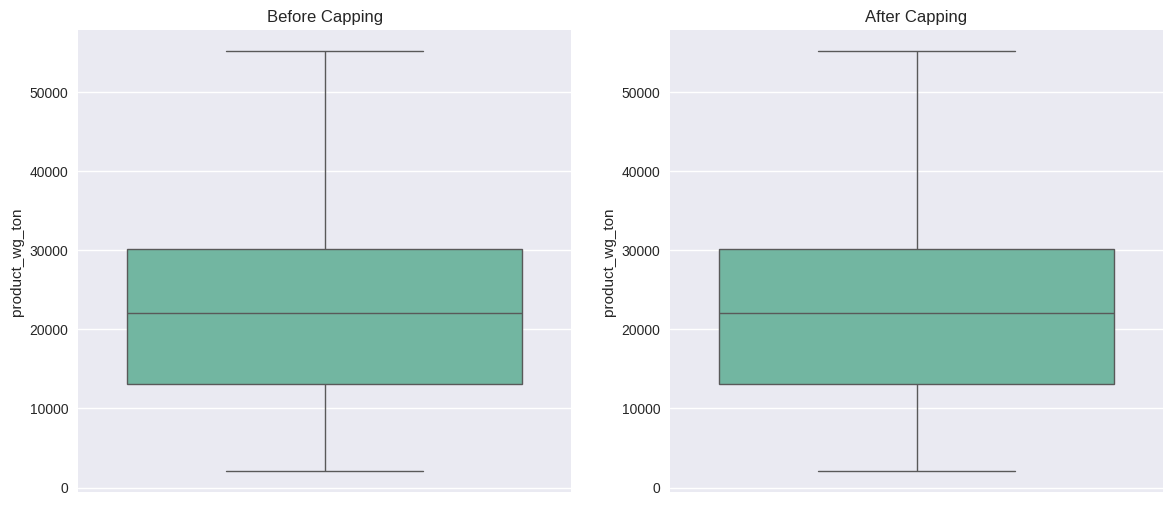

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(data=df, y='product_wg_ton')
plt.title("Before Capping")

plt.subplot(1,2,2)
sns.boxplot(data=df_capped, y='product_wg_ton')
plt.title("After Capping")
plt.show()

In [22]:
# ============================================================
# SECTION 5.4 — Anomalous Value Checks + Fix for transport_issue_l1y
# Paste and run this cell AFTER you have df_capped (post-capping)
# It will check anomalies, apply the transport_issue_l1y fix, and recheck.
# ============================================================

import pandas as pd
import numpy as np

# --- Safety: ensure df_capped exists in the notebook ---
if 'df_capped' not in globals():
    raise RuntimeError("df_capped not found. Run outlier-capping step first to create df_capped.")

# Work on a copy to be safe
df_anom = df_capped.copy()

print(">>> Running anomalous value checks (pre-fix) ...\n")

# 1) Negative or zero checks for logically positive numeric fields
checks = {
    'workers_num <= 0': (df_anom['workers_num'] <= 0).sum() if 'workers_num' in df_anom.columns else np.nan,
    'dist_from_hub < 0': (df_anom['dist_from_hub'] < 0).sum() if 'dist_from_hub' in df_anom.columns else np.nan,
    'product_wg_ton <= 0' : (df_anom['product_wg_ton'] <= 0).sum() if 'product_wg_ton' in df_anom.columns else np.nan
}
for k,v in checks.items():
    print(f"{k}: {v}")

# 2) Year sanity check (establishment year)
if 'wh_est_year' in df_anom.columns:
    future_years = (df_anom['wh_est_year'] > 2025).sum()
    very_old = (df_anom['wh_est_year'] < 1950).sum()
    print(f"\nwh_est_year > 2025: {future_years}")
    print(f"wh_est_year < 1950: {very_old}")
else:
    print("\nwh_est_year column not found.")

# 3) Binary indicator fields — check for invalid values (should be only 0 or 1)
binary_cols = ['transport_issue_l1y','electric_supply','flood_proof','flood_impacted','temp_reg_mach']
print("\nBinary field validity (pre-fix):")
for col in binary_cols:
    if col in df_anom.columns:
        total = df_anom.shape[0]
        valid_mask = df_anom[col].isin([0,1])
        invalid_count = (~valid_mask).sum()
        distinct_vals = sorted(df_anom[col].dropna().unique().tolist())
        print(f" - {col}: invalid_count = {invalid_count} / {total}; distinct_vals = {distinct_vals[:10]}")
    else:
        print(f" - {col}: column not present")

# 4) Categorical value sanity (unexpected categories for certain columns)
cat_checks = {
    'WH_capacity_size': ['Small','Mid','Large'],
    'Location_type': ['Urban','Rural'],
    'wh_owner_type': ['Rented','Company Owned']
}
print("\nCategorical expected categories (pre-fix):")
for col, expected in cat_checks.items():
    if col in df_anom.columns:
        uniques = sorted(df_anom[col].dropna().unique().tolist())
        unexpected = [u for u in uniques if u not in expected]
        print(f" - {col}: unique_count={len(uniques)}; unexpected = {unexpected[:10]}")
    else:
        print(f" - {col}: not present")

# --- Specific Fix: transport_issue_l1y needs to be binary per data dictionary ---
# Rationale: if transport_issue_l1y currently stores 'count of issues', convert to indicator:
#   0 -> 0 (no issues), any value >= 1 -> 1 (had at least one issue)
if 'transport_issue_l1y' in df_anom.columns:
    # show value counts pre-fix (small sample)
    print("\ntransport_issue_l1y value_counts (pre-fix, top 10):")
    print(df_anom['transport_issue_l1y'].value_counts(dropna=False).head(10))

    # Apply fix: convert to binary indicator
    df_anom['transport_issue_l1y'] = df_anom['transport_issue_l1y'].apply(lambda x: 1 if (pd.notnull(x) and x >= 1) else 0)

    # show value counts post-fix
    print("\ntransport_issue_l1y value_counts (post-fix):")
    print(df_anom['transport_issue_l1y'].value_counts(dropna=False))
else:
    print("\ntransport_issue_l1y column not present; no fix applied.")

# --- Re-run binary validity checks to confirm fix ---
print("\nBinary field validity (post-fix):")
for col in binary_cols:
    if col in df_anom.columns:
        invalid_count = (~df_anom[col].isin([0,1])).sum()
        print(f" - {col}: invalid_count = {invalid_count}")
    else:
        print(f" - {col}: not present")

# --- Summarize anomalies found and fixed for report ---
summary = {
    'negative_workers': checks['workers_num <= 0'],
    'negative_distance': checks['dist_from_hub < 0'],
    'nonpositive_product_wg': checks['product_wg_ton <= 0'],
    'wh_est_year_future': future_years if 'wh_est_year' in df_anom.columns else np.nan,
    'transport_issue_invalid_pre_fix': None,  # will compute
    'transport_issue_invalid_post_fix': None
}

if 'transport_issue_l1y' in df_anom.columns:
    # compute counts for reporting
    # Note: pre-fix invalid count not stored earlier separately; recalc original via df_capped
    pre_invalid = (~df_capped['transport_issue_l1y'].isin([0,1])).sum() if 'df_capped' in globals() and 'transport_issue_l1y' in df_capped.columns else None
    post_invalid = (~df_anom['transport_issue_l1y'].isin([0,1])).sum()
    summary['transport_issue_invalid_pre_fix'] = pre_invalid
    summary['transport_issue_invalid_post_fix'] = post_invalid

print("\nAnomaly summary (for report):")
for k,v in summary.items():
    print(f" - {k}: {v}")

# --- Save cleaned df back to notebook/global name for downstream steps ---
df_capped = df_anom.copy()
print("\nFinished anomalous checks and transport_issue_l1y fix. Use df_capped for downstream steps.")


>>> Running anomalous value checks (pre-fix) ...

workers_num <= 0: 0
dist_from_hub < 0: 0
product_wg_ton <= 0: 0

wh_est_year > 2025: 0
wh_est_year < 1950: 0

Binary field validity (pre-fix):
 - transport_issue_l1y: invalid_count = 5141 / 25000; distinct_vals = [0.0, 1.0, 2.0, 2.5]
 - electric_supply: invalid_count = 0 / 25000; distinct_vals = [0.0, 1.0]
 - flood_proof: invalid_count = 0 / 25000; distinct_vals = [0.0]
 - flood_impacted: invalid_count = 0 / 25000; distinct_vals = [0.0]
 - temp_reg_mach: invalid_count = 0 / 25000; distinct_vals = [0.0, 1.0]

Categorical expected categories (pre-fix):
 - WH_capacity_size: unique_count=3; unexpected = []
 - Location_type: unique_count=2; unexpected = []
 - wh_owner_type: unique_count=2; unexpected = []

transport_issue_l1y value_counts (pre-fix, top 10):
transport_issue_l1y
0.0    15215
1.0     4644
2.5     2943
2.0     2198
Name: count, dtype: int64

transport_issue_l1y value_counts (post-fix):
transport_issue_l1y
0    15215
1     9785
N

In [23]:
# ============================================================
# SECTION 5.5 — FEATURE ENGINEERING
# Creating meaningful derived features to assist the model
# ============================================================

df_fe = df_capped.copy()   # start from previous cleaned dataset

# 1. Warehouse Age
current_year = 2025
if 'wh_est_year' in df_fe.columns:
    df_fe['warehouse_age'] = current_year - df_fe['wh_est_year']
    print("Created feature: warehouse_age")
    print(df_fe[['wh_est_year','warehouse_age']].head())
else:
    print("wh_est_year column not found — warehouse_age not created.")

# 2. Optional: Binary indicator for storage issues (report-ready)
df_fe['storage_issue_flag'] = df_fe['storage_issue_reported_l3m'].apply(lambda x: 1 if x > 0 else 0)
print("Created feature: storage_issue_flag")

# 3. Optional: Binary indicator for breakdowns (again optional but simple)
df_fe['wh_breakdown_flag'] = df_fe['wh_breakdown_l3m'].apply(lambda x: 1 if x > 0 else 0)
print("Created feature: wh_breakdown_flag")

print("\nNew columns created:",
      ['warehouse_age','storage_issue_flag','wh_breakdown_flag'])

# Save back to main variable for further use
df_capped = df_fe.copy()

print("\nFeature Engineering complete. Updated df_capped shape:", df_capped.shape)

Created feature: warehouse_age
   wh_est_year  warehouse_age
0          NaN            NaN
1          NaN            NaN
2          NaN            NaN
3          NaN            NaN
4       2009.0           16.0
Created feature: storage_issue_flag
Created feature: wh_breakdown_flag

New columns created: ['warehouse_age', 'storage_issue_flag', 'wh_breakdown_flag']

Feature Engineering complete. Updated df_capped shape: (25000, 27)


In [24]:
# ============================================================
# SECTION 5.6 — ENCODING CATEGORICAL VARIABLES
# ============================================================

df_enc = df_capped.copy()

# 1. Remove ID columns (not useful for modeling)
id_cols = ['Ware_house_ID', 'WH_Manager_ID']
df_enc = df_enc.drop(columns=id_cols, errors='ignore')
print("Dropped ID columns:", id_cols)

# 2. Identify categorical features to one-hot encode
onehot_cols = [
    'Location_type',
    'WH_capacity_size',
    'zone',
    'WH_regional_zone',
    'wh_owner_type',
    'approved_wh_govt_certificate'
]

existing_onehot_cols = [c for c in onehot_cols if c in df_enc.columns]
print("\nCategorical columns to One-Hot Encode:", existing_onehot_cols)

# 3. Apply one-hot encoding
df_enc = pd.get_dummies(df_enc, columns=existing_onehot_cols, drop_first=True)

# 4. Ensure binary categorical fields are ints
binary_cols = [
    'transport_issue_l1y',
    'electric_supply',
    'flood_proof',
    'flood_impacted',
    'temp_reg_mach',
    'storage_issue_flag',
    'wh_breakdown_flag'
]

for col in binary_cols:
    if col in df_enc.columns:
        df_enc[col] = df_enc[col].astype(int)

print("\nEncoding complete.")
print("New dataframe shape:", df_enc.shape)

# Show first 10 columns to confirm encoding
df_enc.iloc[:, :10].head()

Dropped ID columns: ['Ware_house_ID', 'WH_Manager_ID']

Categorical columns to One-Hot Encode: ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']

Encoding complete.
New dataframe shape: (25000, 35)


,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num
0,3.0,1,2.0,4651.0,24.0,0,0,1,91.0,29.0
1,0.0,0,4.0,6217.0,47.0,0,0,1,210.0,31.0
2,1.0,0,4.0,4306.0,64.0,0,0,0,161.0,37.0
3,7.0,1,2.0,6000.0,50.0,0,0,0,103.0,21.0
4,3.0,1,2.0,4740.0,42.0,0,0,1,112.0,25.0


In [25]:
# ============================================================
# SECTION 5.7 — FEATURE SCALING
# Scale only continuous numerical features (StandardScaler)
# ============================================================

from sklearn.preprocessing import StandardScaler

df_scaled = df_enc.copy()

# Identify numeric columns (int/float)
num_cols = df_scaled.select_dtypes(include=['int64','float64']).columns.tolist()

# Remove binary indicator columns (do NOT scale them)
binary_cols = [
    'transport_issue_l1y', 'electric_supply', 'flood_proof', 'flood_impacted',
    'temp_reg_mach', 'storage_issue_flag', 'wh_breakdown_flag'
]

num_cols_to_scale = [c for c in num_cols if c not in binary_cols and c != 'product_wg_ton']

print("Numeric columns to scale:", num_cols_to_scale)

# Apply scaling
scaler = StandardScaler()
df_scaled[num_cols_to_scale] = scaler.fit_transform(df_scaled[num_cols_to_scale])

print("\nScaling complete.")
print("Updated dataframe shape:", df_scaled.shape)

# Show sample of scaled data
df_scaled[num_cols_to_scale].head()

Numeric columns to scale: ['num_refill_req_l3m', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num', 'dist_from_hub', 'workers_num', 'wh_est_year', 'storage_issue_reported_l3m', 'wh_breakdown_l3m', 'govt_check_l3m', 'warehouse_age']

Scaling complete.
Updated dataframe shape: (25000, 35)


,num_refill_req_l3m,Competitor_in_mkt,retail_shop_num,distributor_num,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,wh_breakdown_l3m,govt_check_l3m,warehouse_age
0,-0.417807,-0.980772,-0.317618,-1.146546,-1.156575,0.032013,NaN,-0.450876,0.898041,-0.441634,NaN
1,-1.568750,0.803748,1.297843,0.285226,0.740827,0.306647,NaN,-1.433309,-0.285180,-0.209944,NaN
2,-1.185102,0.803748,-0.673514,1.343493,-0.040456,1.130548,NaN,-0.014239,1.489652,0.369282,NaN
3,1.116783,-0.980772,1.073989,0.471979,-0.965240,-1.066522,NaN,-0.014239,-0.285180,0.948508,NaN
4,-0.417807,-0.980772,-0.225807,-0.026028,-0.821739,-0.517255,-0.050902,0.094921,1.489652,0.600972,0.050902


In [29]:
# ============================================================
# SECTION 6 — TRAIN–TEST SPLIT
# ============================================================

from sklearn.model_selection import train_test_split

df_model = df_scaled.copy()

# Define target
target = "product_wg_ton"

# X = features, y = target
X = df_model.drop(columns=[target])
y = df_model[target]

print("Final feature shape:", X.shape)
print("Target shape:", y.shape)

# If 'zone' was one-hot encoded, stratify using original df
if 'zone' in df_capped.columns:
    stratify_col = df_capped['zone']
    print("\nUsing stratified split on 'zone' for balanced regions.")
else:
    stratify_col = None
    print("\nNo stratification applied.")

# Perform split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=stratify_col if stratify_col is not None else None
)

print("\nTrain / Test shapes:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

Final feature shape: (25000, 34)
Target shape: (25000,)

Using stratified split on 'zone' for balanced regions.

Train / Test shapes:
X_train: (20000, 34) y_train: (20000,)
X_test: (5000, 34) y_test: (5000,)


NaN counts in X_train (per column):
wh_est_year      9521
warehouse_age    9521
workers_num       770
dtype: int64

NaN counts in X_test (per column):
wh_est_year      2360
warehouse_age    2360
workers_num       220
dtype: int64

Numeric columns to impute (count=18): ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'warehouse_age', 'storage_issue_flag', 'wh_breakdown_flag'] ...

After imputation, total NaNs in X_train: 0
After imputation, total NaNs in X_test:  0

Train -> RMSE: 1124.36 | MAE: 874.01 | R2: 0.9906

Test -> RMSE: 1162.48 | MAE: 894.00 | R2: 0.9900


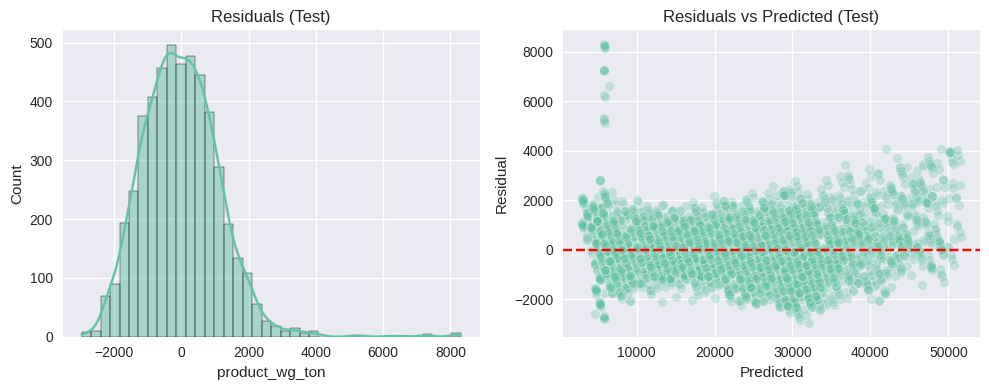


Saved: images/baseline_metrics_imputed_fixed.csv


In [31]:
# -----------------------------
# FIXED: Robust imputation that preserves all columns (keeps one-hot cols)
# -----------------------------
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Diagnostics: which columns contain NaNs (train & test)
print("NaN counts in X_train (per column):")
nan_train = X_train.isnull().sum().sort_values(ascending=False)
print(nan_train[nan_train>0])

print("\nNaN counts in X_test (per column):")
nan_test = X_test.isnull().sum().sort_values(ascending=False)
print(nan_test[nan_test>0])

# 2) Identify numeric columns only (these include one-hot 0/1 columns too but that's ok)
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumeric columns to impute (count={len(num_cols)}): {num_cols[:20]} ...")

# 3) Fit imputer on train numeric columns and transform both train & test.
num_imputer = SimpleImputer(strategy='median')

# Fit on X_train numeric values
X_train_num = pd.DataFrame(num_imputer.fit_transform(X_train[num_cols]),
                           columns=num_cols, index=X_train.index)
X_test_num = pd.DataFrame(num_imputer.transform(X_test[num_cols]),
                          columns=num_cols, index=X_test.index)

# 4) Put imputed numeric columns back into copies of full X_train / X_test (preserve all other columns)
X_train_imputed = X_train.copy()
X_test_imputed  = X_test.copy()

X_train_imputed[num_cols] = X_train_num[num_cols]
X_test_imputed[num_cols]  = X_test_num[num_cols]

# 5) Final NaN sanity check
print("\nAfter imputation, total NaNs in X_train:", X_train_imputed.isnull().sum().sum())
print("After imputation, total NaNs in X_test: ", X_test_imputed.isnull().sum().sum())

# If still NaNs (unlikely), print which columns
if X_train_imputed.isnull().sum().sum() > 0:
    print("\nColumns with NaNs in X_train after imputation:")
    print(X_train_imputed.isnull().sum()[X_train_imputed.isnull().sum()>0])
if X_test_imputed.isnull().sum().sum() > 0:
    print("\nColumns with NaNs in X_test after imputation:")
    print(X_test_imputed.isnull().sum()[X_test_imputed.isnull().sum()>0])

# 6) Re-train Linear Regression baseline on imputed data
lr = LinearRegression()
lr.fit(X_train_imputed, y_train)

train_preds = lr.predict(X_train_imputed)
test_preds  = lr.predict(X_test_imputed)

def eval_reg(y_true, y_pred, label=""):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{label} -> RMSE: {rmse:.2f} | MAE: {mae:.2f} | R2: {r2:.4f}")
    return rmse, mae, r2

train_metrics = eval_reg(y_train, train_preds, "Train")
test_metrics  = eval_reg(y_test, test_preds, "Test")

# 7) Residual plots (test)
residuals = y_test - test_preds
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(residuals, kde=True, bins=40)
plt.title("Residuals (Test)")

plt.subplot(1,2,2)
sns.scatterplot(x=test_preds, y=residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted (Test)")
plt.tight_layout()
plt.show()

# 8) Save metrics for PDF if desired
metrics_df = pd.DataFrame({
    "dataset":["train","test"],
    "rmse":[train_metrics[0], test_metrics[0]],
    "mae":[train_metrics[1], test_metrics[1]],
    "r2":[train_metrics[2], test_metrics[2]]
})
metrics_df.to_csv("images/baseline_metrics_imputed_fixed.csv", index=False)
print("\nSaved: images/baseline_metrics_imputed_fixed.csv")



Training Performance:
RMSE: 1124.36
MAE:  874.01
R²:   0.9906

Testing Performance:
RMSE: 1162.48
MAE:  894.00
R²:   0.9900

Saved baseline_metrics.csv


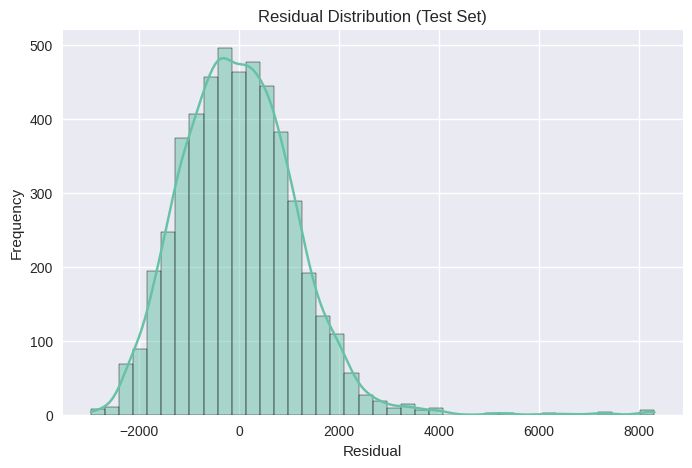

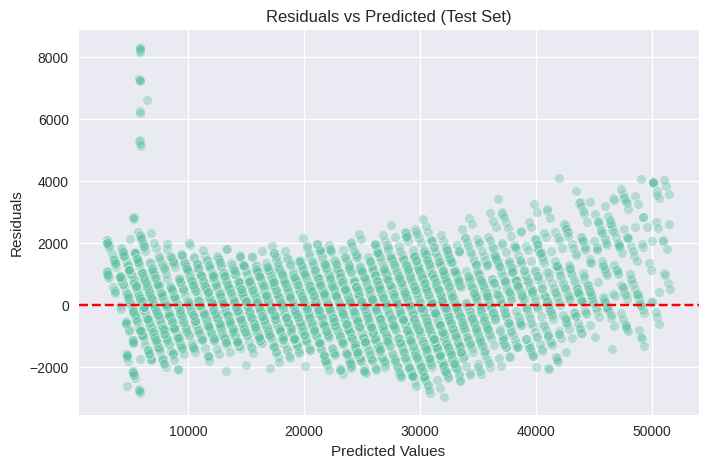


Baseline model training complete.


In [33]:
# ============================================================
# SECTION 7 — BASELINE MODEL: LINEAR REGRESSION
# ============================================================

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Train baseline Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_imputed, y_train)

# 2. Predictions
train_pred = lr_model.predict(X_train_imputed)
test_pred = lr_model.predict(X_test_imputed)

# 3. Evaluation Function
def evaluate_model(y_true, y_pred, label=""):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{label} Performance:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE:  {mae:.2f}")
    print(f"R²:   {r2:.4f}")
    return rmse, mae, r2

# 4. Print Metrics
train_metrics = evaluate_model(y_train, train_pred, "Training")
test_metrics  = evaluate_model(y_test, test_pred, "Testing")

# 5. Save metrics summary
import pandas as pd
metrics_df = pd.DataFrame({
    "Dataset": ["Train", "Test"],
    "RMSE": [train_metrics[0], test_metrics[0]],
    "MAE": [train_metrics[1], test_metrics[1]],
    "R2":  [train_metrics[2], test_metrics[2]],
})
metrics_df.to_csv("baseline_metrics.csv", index=False)
print("\nSaved baseline_metrics.csv")

# 6. Residual diagnostics
residuals = y_test - test_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=40, kde=True)
plt.title("Residual Distribution (Test Set)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.savefig("residual_distribution.png", dpi=200, bbox_inches='tight')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x=test_pred, y=residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted (Test Set)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.savefig("residuals_vs_predicted.png", dpi=200, bbox_inches='tight')
plt.show()

print("\nBaseline model training complete.")